<table align="left" width=100%>
    <tr>
        <td>
            <div align="middle">
                <font color="#21618C" size=5px>
                  <b>EMPLOYEE ATTRITION BY HR ANALYSIS
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Problem Statement

-We analyse and predict, the dataset containing information about the employees working in an organisation and the factors affecting the chances of attrition based on the geographical, familial and economical conditions as well as their job history. 

-We are building a suitable model to predict the attrition considering relevant features and parameters, thus making it easier for HR department to make appropriate decisions.

## Data Description 

AGE - Numerical Value

ATTRITION - Employee leaving the company (0=Current Employee, 1=Voluntary Resignation)

BUSINESS TRAVEL - (1=No Travel, 2=Travel Frequently, 3=Tavel Rarely)

DAILY RATE - Salary Level

DEPARTMENT - (1=HR, 2=R&D, 3=Sales)

DISTANCE FROM HOME - The distance from work to home

EDUCATION - (1=Below College, 2=College, 3=Bachelor, 4=Master, 5=Doctor)

EMPLOYEE COUNT - Numerical Value

EDUCATION FIELD - (1=HR, 2=LIFE SCIENCES, 3=MARKETING, 4=MEDICAL SCIENCES,
 5=OTHERS, 6= TEHCNICAL)

EMPLOYEE NUMBER	- EMPLOYEE ID

ENVIROMENT SATISFACTION	- Satisfaction with the environment

GENDER - (1=FEMALE, 2=MALE)

HOURLY RATE - Hourly Salary

JOB INVOLVEMENT - (1=Low, 2=Medium, 3=High, 4=Very High)

JOB LEVEL - Level of Job

JOB ROLE - Position

JOB SATISFACTION - (1=Low, 2=Medium, 3=High, 4=Very High)

MARITAL STATUS - (1=Divorced, 2=Married, 3=Single)

MONTHLY INCOME - Monthly Salary

MONTHY RATE - MONTHY RATE

NUMCOMPANIES WORKED - Number of companies worked	

OVER 18 - (Y=YES, N=NO)

OVERTIME - (YES, NO)

PERCENT SALARY HIKE - Percentage increase in salary

PERFORMANCE RATING - (1=Low, 2=Good, 3=Excellent, 4=Outstanding)

RELATIONSHIP SATISFACTION - (1=Low, 2=Medium, 3=High, 4=Very High)

STANDARD HOURS - Standard working hours

STOCK OPTIONS LEVEL - Stock options

TOTAL WORKING YEARS - Number of years worked

TRAINING TIMES LAST YEAR - Hours spent for training

WORK LIFE BALANCE - Time spent between work and personal life

YEARS AT COMPANY - Total number of years at the company

YEARS IN CURRENT ROLE - Number of years in current role

YEARS SINCE LAST PROMOTION - Years since last promotion

YEARS WITH CURRENT MANAGER - Years spent with current manager

## Table of Content

1. **[Import Libraries](#import_lib)**
2. **[Set Options](#set_options)**
3. **[Read Data](#RD)**
4. **[Data Analysis and Preparation](#data_preparation)**
5. **[Base Model](#LogisticReg)**


## 1. Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.externals.six import StringIO  
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import export_graphviz
import featuretools as ft

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

import pydotplus
from IPython.display import Image  
import graphviz

## 2. Set Options 

In [2]:
# pd.options.display.max_columns = None

# pd.options.display.max_rows = None

# np.set_printoptions(suppress=True)

## 3. Read Data

In [3]:
df = pd.read_csv("IBM HR Data new.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
0,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
1,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
2,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,7,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
3,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,8,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
4,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,9,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral


## 4. Data Analysis and Preparation

In [4]:
df.shape

(23436, 37)

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>We see that there are 23,436 observations and 37 features </br></b>
                </font>
            </div>
        </td>
    </tr>
</table>




In [5]:
df.describe()

,Age,DailyRate,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,MonthlyRate,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,23433.000000,23424.000000,23424.000000,23427.000000,23427.000000,23429.000000,23425.000000,23427.000000,23426.000000,23428.000000,23426.000000,23427.000000,23428.00000,23425.000000,23426.000000,23423.000000,23421.000000,23425.000000,23429.000000
mean,36.936671,801.828765,2.910050,13.681777,2.733811,2.064023,14304.343821,3.887779,3.155852,2.713334,79.993469,0.799846,11.25922,2.800171,2.761803,7.010887,4.227445,2.183821,4.127577
std,9.137432,403.206166,1.024931,1186.544372,0.836860,1.105421,7102.636293,155.332904,0.371215,1.080030,0.706850,1.122454,7.77237,1.308527,0.705788,6.138394,3.627284,3.218615,3.572379
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,2094.000000,0.000000,3.000000,1.000000,3.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,1.000000,8053.000000,1.000000,3.000000,2.000000,80.000000,0.000000,6.00000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,3.000000,3.000000,3.000000,2.000000,14222.000000,2.000000,3.000000,3.000000,80.000000,1.000000,10.00000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,4.000000,4.000000,3.000000,3.000000,20460.000000,4.000000,3.000000,4.000000,80.000000,1.000000,15.00000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,6.000000,129588.000000,54.000000,5.000000,26999.000000,23258.000000,13.000000,4.000000,80.000000,80.000000,40.00000,30.000000,4.000000,40.000000,22.000000,17.000000,17.000000


In [6]:
df.describe(include='object')

,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EmployeeCount,EmployeeNumber,Application ID,Gender,HourlyRate,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,Over18,OverTime,PercentSalaryHike,Employee Source
count,23423,23428,23425,23427,23427,23431,23435,23433,23426,23427,23427,23427,23425,23423,23426,23424,23422,23424
unique,2,3,4,59,8,3,23366,23419,4,73,11,5,4,1351,2,3,17,12
top,Current employee,Travel_Rarely,Research & Development,1,Life Sciences,1,23244,123457,Male,66,Sales Executive,4,Married,2342,Y,No,11,Company Website
freq,19714,16620,15286,2416,9701,16378,7,2,14056,480,5111,7276,10709,66,23424,16790,3353,5400


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23436 entries, 0 to 23435
Data columns (total 37 columns):
Age                         23433 non-null float64
Attrition                   23423 non-null object
BusinessTravel              23428 non-null object
DailyRate                   23424 non-null float64
Department                  23425 non-null object
DistanceFromHome            23427 non-null object
Education                   23424 non-null float64
EducationField              23427 non-null object
EmployeeCount               23431 non-null object
EmployeeNumber              23435 non-null object
Application ID              23433 non-null object
EnvironmentSatisfaction     23427 non-null float64
Gender                      23426 non-null object
HourlyRate                  23427 non-null object
JobInvolvement              23427 non-null float64
JobLevel                    23429 non-null float64
JobRole                     23427 non-null object
JobSatisfaction             23427 n

In [8]:
df.isnull().sum()

Age                          3
Attrition                   13
BusinessTravel               8
DailyRate                   12
Department                  11
DistanceFromHome             9
Education                   12
EducationField               9
EmployeeCount                5
EmployeeNumber               1
Application ID               3
EnvironmentSatisfaction      9
Gender                      10
HourlyRate                   9
JobInvolvement               9
JobLevel                     7
JobRole                      9
JobSatisfaction              9
MaritalStatus               11
MonthlyIncome               13
MonthlyRate                 11
NumCompaniesWorked           9
Over18                      10
OverTime                    12
PercentSalaryHike           14
PerformanceRating           10
RelationshipSatisfaction     8
StandardHours               10
StockOptionLevel             9
TotalWorkingYears            8
TrainingTimesLastYear       11
WorkLifeBalance             10
YearsAtC

In [9]:
total = df.isnull().sum()
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

print(missing_data)

                          Total   Percent
Age                           3  0.012801
Application ID                3  0.012801
Attrition                    13  0.055470
BusinessTravel                8  0.034136
DailyRate                    12  0.051203
Department                   11  0.046936
DistanceFromHome              9  0.038402
Education                    12  0.051203
EducationField                9  0.038402
Employee Source              12  0.051203
EmployeeCount                 5  0.021335
EmployeeNumber                1  0.004267
EnvironmentSatisfaction       9  0.038402
Gender                       10  0.042669
HourlyRate                    9  0.038402
JobInvolvement                9  0.038402
JobLevel                      7  0.029869
JobRole                       9  0.038402
JobSatisfaction               9  0.038402
MaritalStatus                11  0.046936
MonthlyIncome                13  0.055470
MonthlyRate                  11  0.046936
NumCompaniesWorked            9  0

In [10]:
df['Attrition'] = df['Attrition'].replace(['Current employee','Voluntary Resignation'],[0,1])

In [11]:
df[df['Education']==6]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
15655,33.0,0.0,Travel_Frequently,NaN,1296,Research & Development,6.0,3,Marketing,1,...,4.0,80.0,0.0,22.0,3.0,3.0,22.0,17.0,11.0,15


In [12]:
df.drop(15655,inplace=True)

In [13]:
df['Education'] = df['Education'].replace([1,2,3,4,5],['Below college','College','Bachelors','Master','Doctorate'])

In [14]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'Application ID', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Employee Source'],
      dtype='object')

In [15]:
df.drop(['EmployeeCount','EmployeeNumber','Application ID','Over18'],inplace=True,axis=1)

In [16]:
df[['EnvironmentSatisfaction','JobSatisfaction','PerformanceRating', 'RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance']]

,EnvironmentSatisfaction,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
0,2.0,4,3.0,1.0,0.0,1.0
1,2.0,4,3.0,1.0,0.0,1.0
2,2.0,4,3.0,1.0,0.0,1.0
3,2.0,4,3.0,1.0,0.0,1.0
4,2.0,4,3.0,1.0,0.0,1.0
...,...,...,...,...,...,...
23431,3.0,4,4.0,3.0,1.0,3.0
23432,3.0,4,4.0,3.0,1.0,4.0
23433,4.0,3,3.0,3.0,2.0,2.0
23434,3.0,1,3.0,4.0,0.0,3.0


In [17]:
df['Gender'] = df['Gender'].replace(['Male','Female'],[0,1])

In [18]:
df[df['Gender']=='2']

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
17027,44.0,0.0,Non-Travel,111.0,Research & Development,17,Bachelors,Medical,129588.0,2,...,3.0,80.0,0.0,30.0,2.0,3.0,5.0,4.0,1.0,2


In [19]:
df.drop(17027,inplace=True)

## Null Imputation

In [20]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [21]:
df['Attrition'] = df['Attrition'].fillna(df['Attrition'].mode()[0])

In [22]:
df['BusinessTravel'] = df['BusinessTravel'].fillna(df['BusinessTravel'].mode()[0])

In [23]:
df['DailyRate'] = df['DailyRate'].fillna(df['DailyRate'].mean())

In [24]:
df['Department'] = df['Department'].fillna(df['Department'].mode()[0])

In [25]:
df['DistanceFromHome'] = df['DistanceFromHome'].astype(float)
df['DistanceFromHome'] = df['DistanceFromHome'].fillna(df['DistanceFromHome'].mean())

In [26]:
df['Education'] = df['Education'].fillna(df['Education'].mode()[0])

In [27]:
df['EducationField'] = df['EducationField'].fillna(df['EducationField'].mode()[0])

In [28]:
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].fillna(df['EnvironmentSatisfaction'].median())

In [29]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [30]:
df['HourlyRate'] = df['HourlyRate'].astype(float)
df['HourlyRate'] = df['HourlyRate'].fillna(df['HourlyRate'].mean())

In [31]:
df['JobInvolvement'] = df['JobInvolvement'].fillna(df['JobInvolvement'].median())

In [32]:
df['JobLevel'] = df['JobLevel'].fillna(df['JobLevel'].mean())

In [33]:
df['JobRole'] = df['JobRole'].fillna(df['JobRole'].mode()[0])

In [34]:
df['JobSatisfaction'] = df['JobSatisfaction'].astype(float)
df['JobSatisfaction'] = df['JobSatisfaction'].fillna(df['JobSatisfaction'].mean())

In [35]:
df['MaritalStatus'] = df['MaritalStatus'].fillna(df['MaritalStatus'].mode()[0])

In [36]:
df['MonthlyIncome'] = df['MonthlyIncome'].astype(float)
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df['MonthlyIncome'].median())

In [37]:
df['MonthlyRate'] = df['MonthlyRate'].fillna(df['MonthlyRate'].mean())

In [38]:
df['NumCompaniesWorked'] = df['NumCompaniesWorked'].fillna(df['NumCompaniesWorked'].median())

In [39]:
df['OverTime'] = df['OverTime'].fillna(df['OverTime'].mode()[0])

In [40]:
df['PercentSalaryHike'] = df['PercentSalaryHike'].astype(float)
df['PercentSalaryHike'] = df['PercentSalaryHike'].fillna(df['PercentSalaryHike'].mean())

In [41]:
df['PerformanceRating'] = df['PerformanceRating'].fillna(df['PerformanceRating'].median())

In [42]:
df['RelationshipSatisfaction'] = df['RelationshipSatisfaction'].fillna(df['RelationshipSatisfaction'].mean())

In [43]:
df['StandardHours'] = df['StandardHours'].fillna(df['StandardHours'].mean())

In [44]:
df['StockOptionLevel'] = df['StockOptionLevel'].fillna(df['StockOptionLevel'].median())

In [45]:
df['TotalWorkingYears'] = df['TotalWorkingYears'].fillna(df['TotalWorkingYears'].median())

In [46]:
df['TrainingTimesLastYear'] = df['TrainingTimesLastYear'].fillna(df['TrainingTimesLastYear'].median())

In [47]:
df['WorkLifeBalance'] = df['WorkLifeBalance'].fillna(df['WorkLifeBalance'].mean())

In [48]:
df['YearsAtCompany'] = df['YearsAtCompany'].fillna(df['YearsAtCompany'].median())

In [49]:
df['YearsInCurrentRole'] = df['YearsInCurrentRole'].fillna(df['YearsInCurrentRole'].median())

In [50]:
df['YearsSinceLastPromotion'] = df['YearsSinceLastPromotion'].fillna(df['YearsSinceLastPromotion'].median())

In [51]:
df['YearsWithCurrManager'] = df['YearsWithCurrManager'].fillna(df['YearsWithCurrManager'].median())

In [52]:
df['Employee Source'] = df['Employee Source'].fillna(df['Employee Source'].mode()[0])

In [53]:
df.drop('StandardHours',axis=1,inplace=True)

In [54]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Employee Source             0
dtype: int64

## Checking for Outliers

In [55]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [56]:
total_out = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

In [57]:
percent_out = ((((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()/df.count())*100).sort_values(ascending=False)

In [58]:
outliers = pd.concat([total_out, percent_out], axis=1, keys=['Total', 'Percent'])
outliers

,Total,Percent
Age,0,0.000000
Attrition,3709,15.827430
BusinessTravel,0,0.000000
DailyRate,0,0.000000
Department,0,0.000000
DistanceFromHome,0,0.000000
Education,0,0.000000
EducationField,0,0.000000
Employee Source,0,0.000000
EnvironmentSatisfaction,0,0.000000


In [59]:
col = ['BusinessTravel','Education','Department','EducationField','Gender','JobRole','MaritalStatus', 'OverTime','Employee Source']

In [60]:
dfnew = pd.get_dummies(df[col] , drop_first = True) 

In [61]:
df.drop(col,inplace=True,axis=1)

In [62]:
df=pd.concat([df,dfnew],axis=1)

In [63]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,23426,23427,23428,23429,23430,23431,23432,23433,23434,23435
Age,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,...,60.0,60.0,60.0,60.0,60.0,60.0,60.0,36.936537,36.936537,36.936537
Attrition,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000
DailyRate,1102.0,1102.0,1102.0,1102.0,1102.0,1102.0,1102.0,1102.0,1102.0,1102.0,...,370.0,370.0,370.0,370.0,370.0,370.0,370.0,1009.000000,1354.000000,1142.000000
DistanceFromHome,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,5.000000,8.000000
EnvironmentSatisfaction,2.0,2.0,2.0,2.0,2.0,4.0,1.0,2.0,2.0,2.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.000000,3.000000,4.000000
HourlyRate,94.0,94.0,94.0,94.0,94.0,33.0,41.0,94.0,94.0,94.0,...,92.0,92.0,92.0,92.0,92.0,92.0,92.0,83.000000,45.000000,72.000000
JobInvolvement,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.000000,2.000000,3.000000
JobLevel,2.0,2.0,2.0,2.0,2.0,4.0,5.0,2.0,2.0,2.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.000000,3.000000,2.000000
JobSatisfaction,4.0,4.0,4.0,4.0,4.0,3.0,1.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.000000,1.000000,4.000000
MonthlyIncome,5993.0,5993.0,5993.0,5993.0,5993.0,14756.0,19566.0,5993.0,5993.0,5993.0,...,10883.0,10883.0,10883.0,10883.0,10883.0,10883.0,10883.0,5301.000000,11631.000000,4069.000000


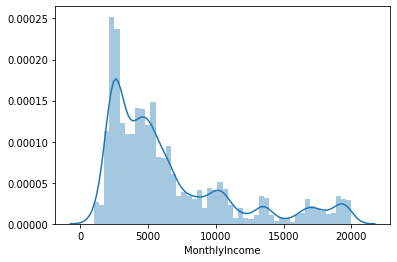

In [64]:
sns.distplot(df['MonthlyIncome'])

In [65]:
df['MonthlyIncome'] = df['MonthlyIncome'].apply(lambda x : np.log(x+1))

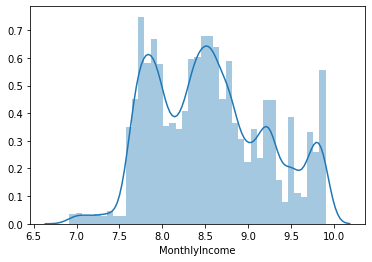

In [66]:
sns.distplot(df['MonthlyIncome'])

In [67]:
df['YearsAtcompany_1_10']=df['YearsAtCompany'][df['YearsAtCompany']<11]

In [68]:
df['YearsAtcompany_11+']=df['YearsAtCompany'][df['YearsAtCompany']>=11]

In [69]:
df['YearsAtcompany_1_10'] = df['YearsAtcompany_1_10'].fillna(0)

In [70]:
df['YearsAtcompany_11+'] = df['YearsAtcompany_11+'].fillna(0)

In [71]:
df['YearsAtcompany_1_10']=df['YearsAtcompany_1_10'].apply(lambda x: 1 if x>1 else x)

In [72]:
df['YearsAtcompany_11+']=df['YearsAtcompany_11+'].apply(lambda x: 1 if x>1 else x)

In [73]:
df['NumCompaniesWorked'].value_counts()

1.0    8311
0.0    3176
3.0    2508
2.0    2339
4.0    2208
7.0    1171
6.0    1108
5.0    1002
9.0     818
8.0     793
Name: NumCompaniesWorked, dtype: int64

In [74]:
df['NumCompaniesWorked_0_5']=df['NumCompaniesWorked'][df['NumCompaniesWorked']<=5]

In [75]:
df['NumCompaniesWorked_6+']=df['NumCompaniesWorked'][df['NumCompaniesWorked']>5]

In [76]:
df['NumCompaniesWorked_0_5'] = df['NumCompaniesWorked_0_5'].fillna(0)

In [77]:
df['NumCompaniesWorked_6+'] = df['NumCompaniesWorked_6+'].fillna(0)

In [78]:
df['NumCompaniesWorked_0_5']=df['NumCompaniesWorked_0_5'].apply(lambda x: 1 if x>1 else x)

In [79]:
df['NumCompaniesWorked_6+']=df['NumCompaniesWorked_6+'].apply(lambda x: 1 if x>1 else x)

In [80]:
df['PerformanceRating'].value_counts()

3.0    19801
4.0     3633
Name: PerformanceRating, dtype: int64

In [81]:
df['PerformanceRating_3']=df['PerformanceRating'][df['PerformanceRating']==3]

In [82]:
df['PerformanceRating_4']=df['PerformanceRating'][df['PerformanceRating']==4]

In [83]:
df['PerformanceRating_3'] = df['PerformanceRating_3'].fillna(0)

In [84]:
df['PerformanceRating_4'] = df['PerformanceRating_4'].fillna(0)

In [85]:
df['PerformanceRating_3']=df['PerformanceRating_3'].apply(lambda x: 1 if x>=1 else x)

In [86]:
df['PerformanceRating_4']=df['PerformanceRating_4'].apply(lambda x: 1 if x>=1 else x)

In [87]:
df['StockOptionLevel'].value_counts()

0.0    10066
1.0     9492
2.0     2533
3.0     1343
Name: StockOptionLevel, dtype: int64

In [88]:
df['StockOptionLevel0_1']=df['StockOptionLevel'][df['StockOptionLevel']<=1]

In [89]:
df['StockOptionLevel2_3']=df['StockOptionLevel'][df['StockOptionLevel']>1]

In [90]:
df['StockOptionLevel0_1'] = df['StockOptionLevel0_1'].fillna(0)

In [91]:
df['StockOptionLevel2_3'] = df['StockOptionLevel2_3'].fillna(0)

In [92]:
df['StockOptionLevel0_1']=df['StockOptionLevel0_1'].apply(lambda x: 1 if x>=1 else x)

In [93]:
df['StockOptionLevel2_3']=df['StockOptionLevel2_3'].apply(lambda x: 1 if x>=1 else x)

In [94]:
df['TotalWorkingYears'].value_counts()

10.0    3249
6.0     1992
8.0     1653
9.0     1538
5.0     1396
7.0     1285
1.0     1284
4.0      992
12.0     757
3.0      670
15.0     621
16.0     614
11.0     571
13.0     569
21.0     540
17.0     517
14.0     495
2.0      485
20.0     480
18.0     425
23.0     354
19.0     350
22.0     330
24.0     288
26.0     223
28.0     221
25.0     220
0.0      209
29.0     160
32.0     150
31.0     148
33.0     110
30.0     105
27.0     104
36.0      92
34.0      82
37.0      56
35.0      46
40.0      37
38.0      16
Name: TotalWorkingYears, dtype: int64

In [95]:
df['TotalWorkingYears_1-10']=df['TotalWorkingYears'][df['TotalWorkingYears']<=10]

In [96]:
df['TotalWorkingYears_11+']=df['TotalWorkingYears'][df['TotalWorkingYears']>10]

In [97]:
df['TotalWorkingYears_1-10'] = df['TotalWorkingYears_1-10'].fillna(0)

In [98]:
df['TotalWorkingYears_11+'] = df['TotalWorkingYears_11+'].fillna(0)

In [99]:
df['TotalWorkingYears_1-10']=df['TotalWorkingYears_1-10'].apply(lambda x: 1 if x>=1 else x)

In [100]:
df['TotalWorkingYears_11+']=df['TotalWorkingYears_11+'].apply(lambda x: 1 if x>=1 else x)

In [101]:
df['TrainingTimesLastYear'].value_counts()

2.0    8725
3.0    7817
4.0    1970
5.0    1882
1.0    1126
6.0    1043
0.0     871
Name: TrainingTimesLastYear, dtype: int64

In [102]:
df['TrainingTimesLastYear_0_4']=df['TrainingTimesLastYear'][df['TrainingTimesLastYear']<=4]

In [103]:
df['TrainingTimesLastYear_5+']=df['TrainingTimesLastYear'][df['TrainingTimesLastYear']>4]

In [104]:
df['TrainingTimesLastYear_0_4'] = df['TrainingTimesLastYear_0_4'].fillna(0)

In [105]:
df['TrainingTimesLastYear_5+'] = df['TrainingTimesLastYear_5+'].fillna(0)

In [106]:
df['TrainingTimesLastYear_0_4']=df['TrainingTimesLastYear_0_4'].apply(lambda x: 1 if x>=1 else x)

In [107]:
df['TrainingTimesLastYear_5+']=df['TrainingTimesLastYear_5+'].apply(lambda x: 1 if x>=1 else x)

In [108]:
df['YearsInCurrentRole'].value_counts()

2.0     5928
0.0     3925
7.0     3516
3.0     2156
4.0     1635
8.0     1426
9.0     1074
1.0      887
5.0      593
6.0      591
10.0     459
11.0     359
13.0     221
14.0     176
12.0     149
15.0     134
16.0     110
17.0      63
18.0      32
Name: YearsInCurrentRole, dtype: int64

In [109]:
df['YearsInCurrentRole0_10']=df['YearsInCurrentRole'][df['YearsInCurrentRole']<=10]

In [110]:
df['YearsInCurrentRole11+']=df['YearsInCurrentRole'][df['YearsInCurrentRole']>10]

In [111]:
df['YearsInCurrentRole0_10'] = df['YearsInCurrentRole0_10'].fillna(0)

In [112]:
df['YearsInCurrentRole11+'] = df['YearsInCurrentRole11+'].fillna(0)

In [113]:
df['YearsInCurrentRole0_10']=df['YearsInCurrentRole0_10'].apply(lambda x: 1 if x>=1 else x)

In [114]:
df['YearsInCurrentRole11+']=df['YearsInCurrentRole11+'].apply(lambda x: 1 if x>=1 else x)

In [115]:
df['YearsSinceLastPromotion'].value_counts()

0.0     9271
1.0     5695
2.0     2533
7.0     1215
4.0      960
3.0      843
5.0      713
6.0      508
11.0     377
8.0      284
9.0      271
15.0     206
12.0     160
13.0     158
14.0     144
10.0      96
Name: YearsSinceLastPromotion, dtype: int64

In [116]:
df['YearsSinceLastPromotion0_10']=df['YearsSinceLastPromotion'][df['YearsSinceLastPromotion']<=10]

In [117]:
df['YearsSinceLastPromotion11+']=df['YearsSinceLastPromotion'][df['YearsSinceLastPromotion']>10]

In [118]:
df['YearsSinceLastPromotion0_10'] = df['YearsSinceLastPromotion0_10'].fillna(0)

In [119]:
df['YearsSinceLastPromotion11+'] = df['YearsSinceLastPromotion11+'].fillna(0)

In [120]:
df['YearsSinceLastPromotion0_10']=df['YearsSinceLastPromotion0_10'].apply(lambda x: 1 if x>=1 else x)

In [121]:
df['YearsSinceLastPromotion11+']=df['YearsSinceLastPromotion11+'].apply(lambda x: 1 if x>=1 else x)

In [122]:
df['YearsWithCurrManager'].value_counts()

2.0     5461
0.0     4197
7.0     3439
3.0     2261
8.0     1696
4.0     1572
1.0     1218
9.0     1035
5.0      496
6.0      457
10.0     435
11.0     350
12.0     277
13.0     238
17.0     112
14.0      79
15.0      79
16.0      32
Name: YearsWithCurrManager, dtype: int64

In [123]:
df['YearsWithCurrManager0_8']=df['YearsWithCurrManager'][df['YearsWithCurrManager']<=8]

In [124]:
df['YearsWithCurrManager9+']=df['YearsWithCurrManager'][df['YearsWithCurrManager']>8]

In [125]:
df['YearsWithCurrManager0_8'] = df['YearsWithCurrManager0_8'].fillna(0)

In [126]:
df['YearsWithCurrManager9+'] = df['YearsWithCurrManager9+'].fillna(0)

In [127]:
df['YearsWithCurrManager0_8']=df['YearsWithCurrManager0_8'].apply(lambda x: 1 if x>=1 else x)

In [128]:
df['YearsWithCurrManager9+']=df['YearsWithCurrManager9+'].apply(lambda x: 1 if x>=1 else x)

In [129]:
df.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Gender',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Education_Below college', 'Education_College', 'Education_Doctorate',
       'Education_Master', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'EducationField_Test', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician'

In [130]:
df.drop(['YearsWithCurrManager','YearsAtCompany', 'YearsInCurrentRole','YearsSinceLastPromotion','PerformanceRating','NumCompaniesWorked','StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear'],axis=1,inplace=True)

## BASE MODEL - Logistic Regression 

In [131]:
X=df.drop('Attrition',axis=1)
y=df['Attrition']

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [133]:
logreg_scaled_features = LogisticRegression()
logreg_scaled_features.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [134]:
y_pred = logreg_scaled_features.predict(X_test)

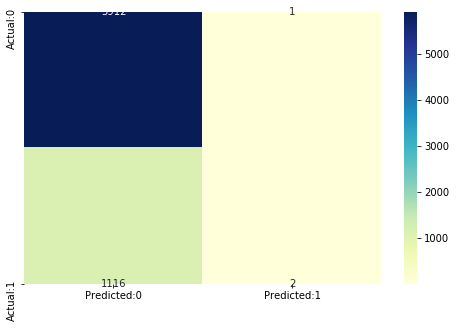

In [135]:
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix  
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set size of the plot
plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [136]:
result = classification_report(y_test,y_pred)

# print the result
print(result)

              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91      5913
         1.0       0.67      0.00      0.00      1118

    accuracy                           0.84      7031
   macro avg       0.75      0.50      0.46      7031
weighted avg       0.81      0.84      0.77      7031



In [137]:
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Negatives are denoted by 'FN'
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

# False Positives are denoted by 'FP'
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]

In [138]:
print(TN,',',TP,',',FN,',',FP)

5912 , 2 , 1116 , 1


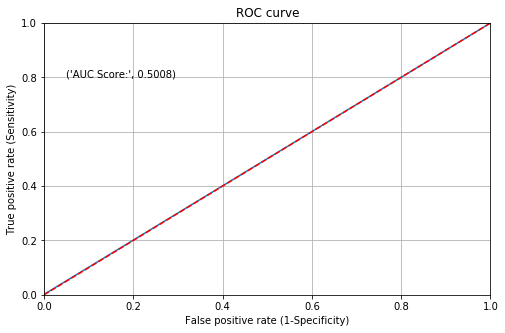

In [139]:
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr,tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1],'r--')

plt.title('ROC curve for logistic Regression')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

plt.text(x = 0.05, y = 0.8, s =('AUC Score:',round(metrics.roc_auc_score(y_test, y_pred),4)))
plt.grid(True)

In [140]:
cols = ['Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','f1-score']

# creating an empty dataframe of the colums
result_tabulation = pd.DataFrame(columns = cols)
Logistic_regression = pd.Series({'Model': "Logistic regression ",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                  'f1-score': metrics.f1_score(y_test, y_pred)})


# appending our result table
result_tabulation = result_tabulation.append(Logistic_regression, ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic regression,0.50081,0.666667,0.001789,0.841132,0.003568


##  Applying Smote

In [141]:
from collections import Counter
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1.0: 19725, 0.0: 19725})


In [142]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.30, random_state = 0)

In [143]:
logreg_scaled_features = LogisticRegression()
logreg_scaled_features.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [144]:
y_pred = logreg_scaled_features.predict(X_test)

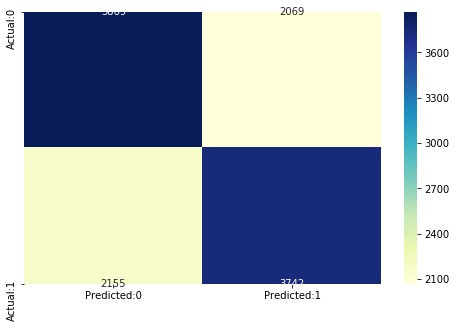

In [145]:
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix  
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set size of the plot
plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [146]:
result = classification_report(y_test,y_pred)

# print the result
print(result)

              precision    recall  f1-score   support

         0.0       0.64      0.65      0.65      5938
         1.0       0.64      0.63      0.64      5897

    accuracy                           0.64     11835
   macro avg       0.64      0.64      0.64     11835
weighted avg       0.64      0.64      0.64     11835



In [147]:
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Negatives are denoted by 'FN'
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

# False Positives are denoted by 'FP'
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]

In [148]:
print(TN,',',TP,',',FN,',',FP)

3869 , 3742 , 2155 , 2069


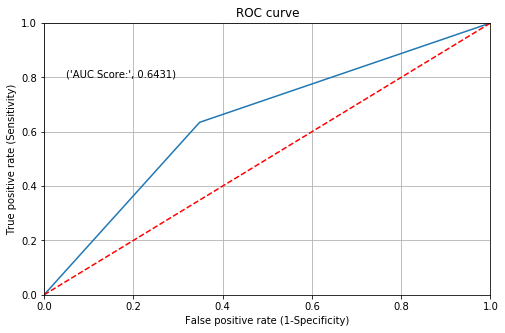

In [149]:
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr,tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1],'r--')

plt.title('ROC curve')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

plt.text(x = 0.05, y = 0.8, s =('AUC Score:',round(metrics.roc_auc_score(y_test, y_pred),4)))
plt.grid(True)

In [150]:
Logistic_regression_After_smote = pd.Series({'Model': "Logistic regression After Smote ",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                  'f1-score': metrics.f1_score(y_test, y_pred)})


# appending our result table
result_tabulation = result_tabulation.append(Logistic_regression_After_smote, ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic regression,0.500810,0.666667,0.001789,0.841132,0.003568
1,Logistic regression After Smote,0.643063,0.643951,0.634560,0.643093,0.639221


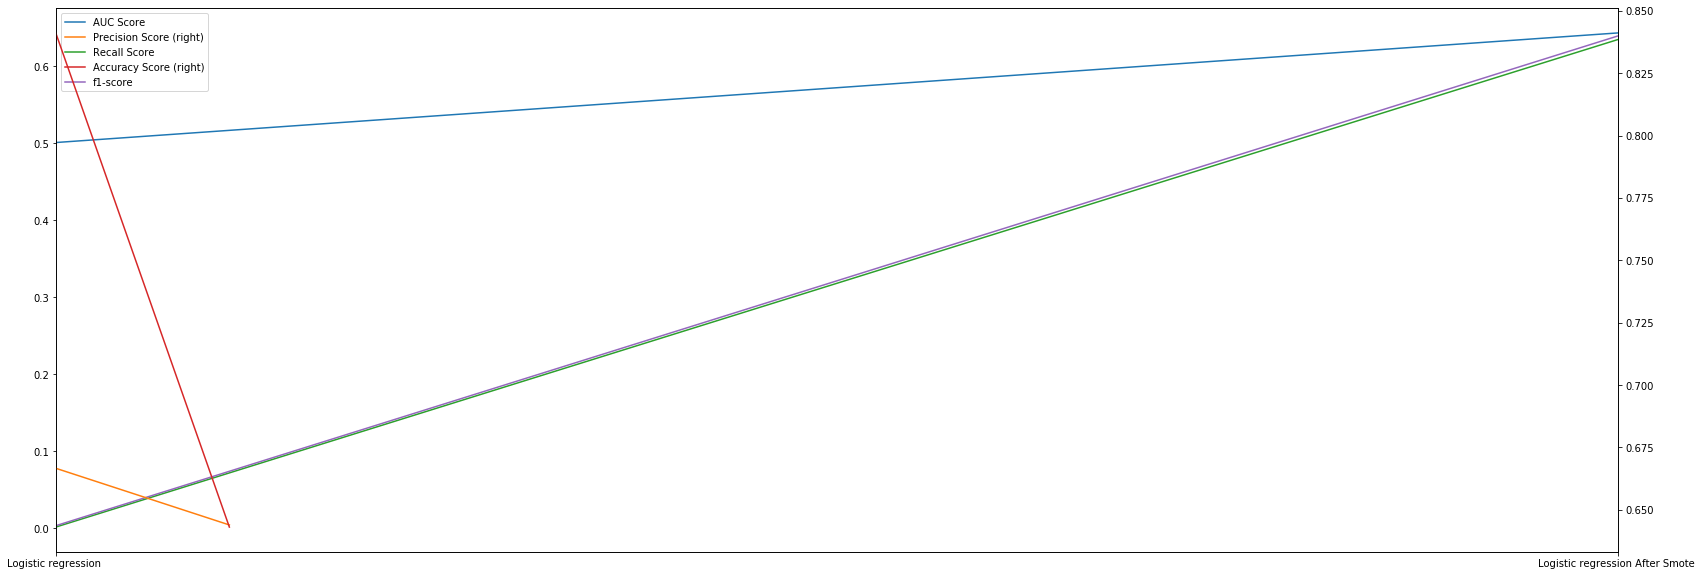

In [151]:
plt.rcParams['figure.figsize']=(28,10)

result_tabulation.plot(secondary_y=['Accuracy Score','Precision Score'], mark_right=True)

plt.xticks([0,1,2,3,4,5,6,7,8,9], list(result_tabulation.Model))
plt.show()

In [152]:
result_tabulation.to_excel('result.xlsx')

In [153]:
dfnew=pd.concat([X_res,y_res],axis=1)

In [154]:
dfnew

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,...,TotalWorkingYears_11+,TrainingTimesLastYear_0_4,TrainingTimesLastYear_5+,YearsInCurrentRole0_10,YearsInCurrentRole11+,YearsSinceLastPromotion0_10,YearsSinceLastPromotion11+,YearsWithCurrManager0_8,YearsWithCurrManager9+,Attrition
0,41.0,1102.0,1.0,2.0,94.0,3.0,2.0,4.0,8.698514,19479.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,41.0,1102.0,1.0,2.0,94.0,3.0,2.0,4.0,8.698514,19479.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,41.0,1102.0,1.0,2.0,94.0,3.0,2.0,4.0,8.698514,19479.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,41.0,1102.0,1.0,2.0,94.0,3.0,2.0,4.0,8.698514,19479.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,41.0,1102.0,1.0,2.0,94.0,3.0,2.0,4.0,8.698514,19479.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39445,36.0,1218.0,9.0,1.0,39.0,3.0,1.0,4.0,7.576610,10910.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
39446,45.0,306.0,26.0,1.0,100.0,3.0,2.0,1.0,8.363342,5630.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
39447,50.0,562.0,8.0,4.0,97.0,3.0,2.0,1.0,8.589328,6225.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
39448,31.0,561.0,3.0,2.0,58.0,3.0,1.0,3.0,7.967973,14168.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


In [155]:
dfnew.to_excel('New IBM.xlsx')

In [156]:
X=dfnew.drop('Attrition',axis=1)
y=dfnew['Attrition']

In [157]:
# from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFE
model = LogisticRegression()
#Initializing RFE model
rfe = RFE(model, 1)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)
#no of features
nof_list=np.arange(1,67)            
high_score=0



[False False False False False False False False False False False False
 False False False False False False False False False False  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False]
[50 63 56 39 61 32 49 41 44 66 54 59 46 38  8 27 48 55 31 51 13 47  1  2
  4  3  5 65 12 35 11 28  7 30 29 52 53 58  6 24 20 22 23 19 18 25 21 64
 62 36 34 33 43 40  9 10 57 37 15 14 42 26 45 60 17 16]


In [158]:
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LogisticRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 52
Score with 52 features: 0.731812


In [159]:
cols = list(X.columns)
model = LogisticRegression()
#Initializing RFE model
rfe = RFE(model, 45)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction',
       'MonthlyIncome', 'Gender', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Education_Doctorate',
       'Department_Research & Development', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'OverTime_Yes',
       'Employee Source_Company Website', 'Employee Source_GlassDoor',
       'Employee Source_Indeed', 'Employee Source_Jora',
       'Employee Source_LinkedIn', 'Employee Source_Recruit.net',
       'Employee Source_Referral', 'Employee Source_Seek',
       'YearsAtcompany_11+', 'NumCompaniesWorked_0_5', 'NumCompaniesWorked_6+',
       'Performanc

In [160]:
dfn=dfnew[['EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction',
       'MonthlyIncome', 'Gender', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Education_Doctorate',
       'Department_Research & Development', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'OverTime_Yes',
       'Employee Source_Company Website', 'Employee Source_GlassDoor',
       'Employee Source_Indeed', 'Employee Source_Jora',
       'Employee Source_LinkedIn', 'Employee Source_Recruit.net',
       'Employee Source_Referral', 'Employee Source_Seek',
       'YearsAtcompany_11+', 'NumCompaniesWorked_0_5', 'NumCompaniesWorked_6+',
       'PerformanceRating_3', 'PerformanceRating_4', 'StockOptionLevel0_1',
       'StockOptionLevel2_3', 'TotalWorkingYears_11+',
       'TrainingTimesLastYear_0_4', 'TrainingTimesLastYear_5+',
       'YearsInCurrentRole0_10', 'YearsInCurrentRole11+',
       'YearsSinceLastPromotion0_10', 'YearsWithCurrManager0_8',
       'YearsWithCurrManager9+']]

In [161]:
X=dfn
y=dfnew['Attrition']

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [163]:
logreg_scaled_features = LogisticRegression()
logreg_scaled_features.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [164]:
y_pred = logreg_scaled_features.predict(X_test)

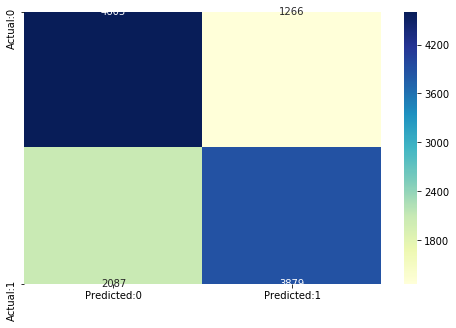

In [165]:
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix  
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set size of the plot
plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [166]:
result = classification_report(y_test,y_pred)

# print the result
print(result)

              precision    recall  f1-score   support

         0.0       0.69      0.78      0.73      5869
         1.0       0.75      0.65      0.70      5966

    accuracy                           0.72     11835
   macro avg       0.72      0.72      0.72     11835
weighted avg       0.72      0.72      0.72     11835



In [167]:
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Negatives are denoted by 'FN'
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

# False Positives are denoted by 'FP'
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]

In [168]:
print(TN,',',TP,',',FN,',',FP)

4603 , 3879 , 2087 , 1266


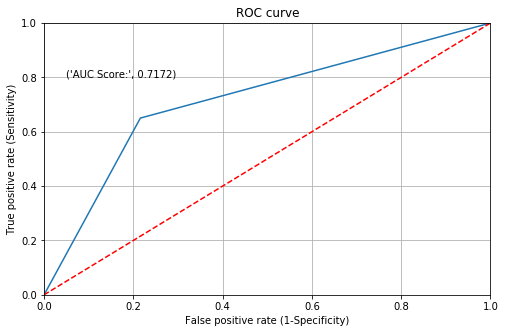

In [169]:
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr,tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1],'r--')

plt.title('ROC curve')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

plt.text(x = 0.05, y = 0.8, s =('AUC Score:',round(metrics.roc_auc_score(y_test, y_pred),4)))
plt.grid(True)

In [170]:
Logistic_regression_after_FS = pd.Series({'Model': "Logistic regression after feature selection",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                  'f1-score': metrics.f1_score(y_test, y_pred)})


# appending our result table
result_tabulation = result_tabulation.append(Logistic_regression_after_FS, ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic regression,0.500810,0.666667,0.001789,0.841132,0.003568
1,Logistic regression After Smote,0.643063,0.643951,0.634560,0.643093,0.639221
2,Logistic regression after feature selection,0.717237,0.753936,0.650184,0.716688,0.698227


## Decision Tree

In [171]:
decision_tree_classification = DecisionTreeClassifier(criterion='entropy')

# train model
decision_tree = decision_tree_classification.fit(X_train, y_train)

In [172]:
decision_tree_pred = decision_tree.predict(X_test)

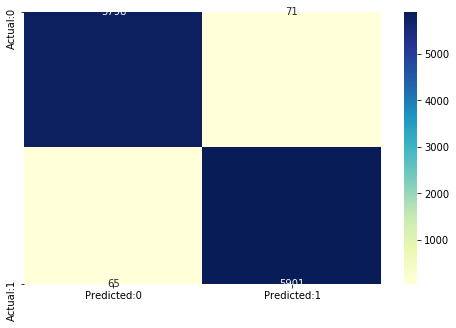

In [173]:
cm = confusion_matrix(y_test, decision_tree_pred)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.show()

In [174]:
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Negatives are denoted by 'FN'
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

# False Positives are denoted by 'FP'
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]

In [175]:
print("Accuracy is:",metrics.accuracy_score(y_test,decision_tree_pred))

print('train score:',decision_tree.score(X_train,y_train))

print('test score:',decision_tree.score(X_test,y_test))

Accuracy is: 0.9885086607520067
train score: 0.9983704508419338
test score: 0.9885086607520067


In [176]:
result = classification_report(y_test, decision_tree_pred)

# print the result
print(result)

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      5869
         1.0       0.99      0.99      0.99      5966

    accuracy                           0.99     11835
   macro avg       0.99      0.99      0.99     11835
weighted avg       0.99      0.99      0.99     11835



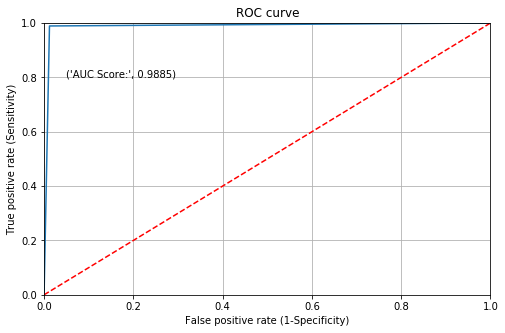

In [177]:
# set the figure size
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, decision_tree_pred)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, decision_tree_pred),4)))


# name the plot, and both axes
plt.title('ROC curve')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

In [178]:
Decision_tree_metrics = pd.Series({'Model': "Decision Tree ",
                     'AUC Score' : metrics.roc_auc_score(y_test, decision_tree_pred),
                 'Precision Score': metrics.precision_score(y_test, decision_tree_pred),
                 'Recall Score': metrics.recall_score(y_test, decision_tree_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, decision_tree_pred),
                 
                  'f1-score':metrics.f1_score(y_test, decision_tree_pred)})



# appending our result table
result_tabulation = result_tabulation.append(Decision_tree_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic regression,0.500810,0.666667,0.001789,0.841132,0.003568
1,Logistic regression After Smote,0.643063,0.643951,0.634560,0.643093,0.639221
2,Logistic regression after feature selection,0.717237,0.753936,0.650184,0.716688,0.698227
3,Decision Tree,0.988504,0.988111,0.989105,0.988509,0.988608


## Pruned Decision Tree

In [179]:
pruned = DecisionTreeClassifier(criterion="entropy", max_depth=25)

# train the classifier
decision_tree_prune = pruned.fit(X_train,y_train)

In [180]:
decision_tree_prune_pred = decision_tree_prune.predict(X_test)

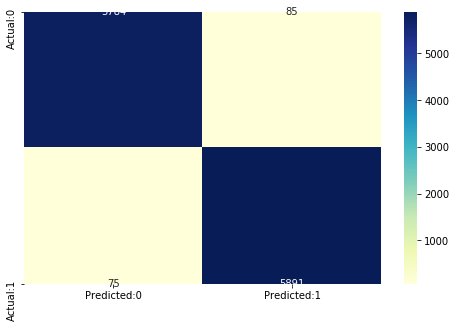

In [181]:
cm = confusion_matrix(y_test, decision_tree_prune_pred)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.show()

In [182]:
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Negatives are denoted by 'FN'
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

# False Positives are denoted by 'FP'
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]

In [183]:
result = classification_report(y_test,decision_tree_prune_pred)

# print the result
print(result)

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      5869
         1.0       0.99      0.99      0.99      5966

    accuracy                           0.99     11835
   macro avg       0.99      0.99      0.99     11835
weighted avg       0.99      0.99      0.99     11835



In [184]:
print("Accuracy is:",metrics.accuracy_score(y_test,decision_tree_prune_pred))

print('train score:',decision_tree_prune.score(X_train,y_train))

print('test score:',decision_tree_prune.score(X_test,y_test))

Accuracy is: 0.986480777355302
train score: 0.9953648379503893
test score: 0.986480777355302


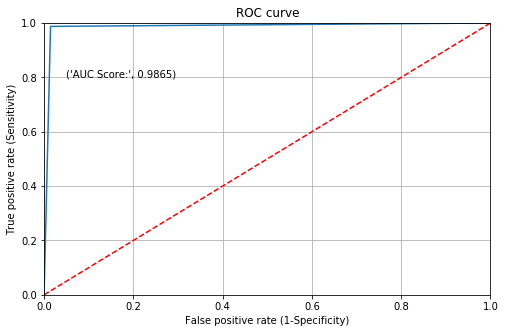

In [185]:
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, decision_tree_prune_pred)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, decision_tree_prune_pred),4)))


# name the plot, and both axes
plt.title('ROC curve')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

In [186]:
Pruned_Decision_tree_metrics = pd.Series({'Model': "Pruned Decision Tree ",
                     'AUC Score' : metrics.roc_auc_score(y_test, decision_tree_prune_pred),
                 'Precision Score': metrics.precision_score(y_test, decision_tree_prune_pred),
                 'Recall Score': metrics.recall_score(y_test, decision_tree_prune_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, decision_tree_prune_pred),
               
                  'f1-score':metrics.f1_score(y_test, decision_tree_prune_pred)})



# appending our result table
result_tabulation = result_tabulation.append(Pruned_Decision_tree_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic regression,0.500810,0.666667,0.001789,0.841132,0.003568
1,Logistic regression After Smote,0.643063,0.643951,0.634560,0.643093,0.639221
2,Logistic regression after feature selection,0.717237,0.753936,0.650184,0.716688,0.698227
3,Decision Tree,0.988504,0.988111,0.989105,0.988509,0.988608
4,Pruned Decision Tree,0.986473,0.985776,0.987429,0.986481,0.986602


In [187]:
param_grid = {"criterion": ["gini", "entropy"],
              "min_samples_split": [10, 20],
              "max_depth": [3, 5, 10, 20,25],
              "min_samples_leaf": [30, 100, 300],
              "max_leaf_nodes": [None,2,3,5],
              }

In [188]:
decision_tree_Gridsearch = DecisionTreeClassifier()
decision_tree_Gridsearch = GridSearchCV(decision_tree_Gridsearch, param_grid, cv=10)
decision_tree_Gridsearch.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                  

## Decision GridSearch

In [189]:
decision_tree_Gridsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 25,
 'max_leaf_nodes': None,
 'min_samples_leaf': 30,
 'min_samples_split': 20}

In [190]:
decision_tree_best_parameters = DecisionTreeClassifier(max_depth= decision_tree_Gridsearch.best_params_.get('max_depth'), 
                                                       min_samples_leaf= decision_tree_Gridsearch.best_params_.get('min_samples_leaf'), 
                                                       min_samples_split= decision_tree_Gridsearch.best_params_.get('min_samples_split'),
                                                       criterion=decision_tree_Gridsearch.best_params_.get('criterion')).fit(X_train, y_train)

In [191]:
decision_tree_best_parameters_pred = decision_tree_best_parameters.predict(X_test)

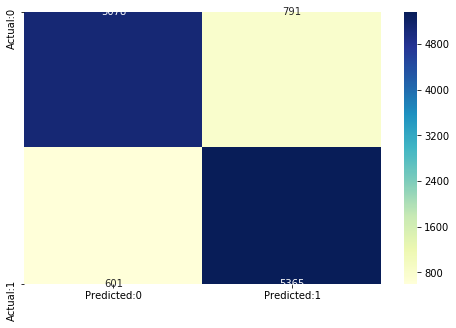

In [192]:
cm = confusion_matrix(y_test, decision_tree_best_parameters_pred)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [193]:
result = classification_report(y_test,decision_tree_best_parameters_pred)

# print the result
print(result)

              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88      5869
         1.0       0.87      0.90      0.89      5966

    accuracy                           0.88     11835
   macro avg       0.88      0.88      0.88     11835
weighted avg       0.88      0.88      0.88     11835



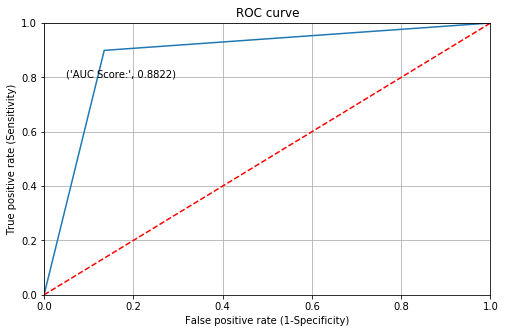

In [194]:
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, decision_tree_best_parameters_pred)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, decision_tree_best_parameters_pred),4)))


# name the plot, and both axes
plt.title('ROC curve')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

In [195]:
Decision_tree_GridSearch_metrics = pd.Series({'Model': "Decision Tree (GridSearchCV) ",
                     'AUC Score' : metrics.roc_auc_score(y_test, decision_tree_best_parameters_pred),
                 'Precision Score': metrics.precision_score(y_test, decision_tree_best_parameters_pred),
                 'Recall Score': metrics.recall_score(y_test, decision_tree_best_parameters_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, decision_tree_best_parameters_pred),
     
                 'f1-score':metrics.f1_score(y_test, decision_tree_best_parameters_pred)})



# appending our result table
result_tabulation = result_tabulation.append(Decision_tree_GridSearch_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic regression,0.500810,0.666667,0.001789,0.841132,0.003568
1,Logistic regression After Smote,0.643063,0.643951,0.634560,0.643093,0.639221
2,Logistic regression after feature selection,0.717237,0.753936,0.650184,0.716688,0.698227
3,Decision Tree,0.988504,0.988111,0.989105,0.988509,0.988608
4,Pruned Decision Tree,0.986473,0.985776,0.987429,0.986481,0.986602
5,Decision Tree (GridSearchCV),0.882243,0.871507,0.899262,0.882383,0.885167


## Random Forest

In [225]:
from sklearn.ensemble import RandomForestClassifier


In [226]:
clf=RandomForestClassifier(n_estimators=5,max_depth=30)
#Train the model using the training sets y_pred=clf.predict(X_test)
ran=clf.fit(X_train,y_train)
#predict the model
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9896915927334178


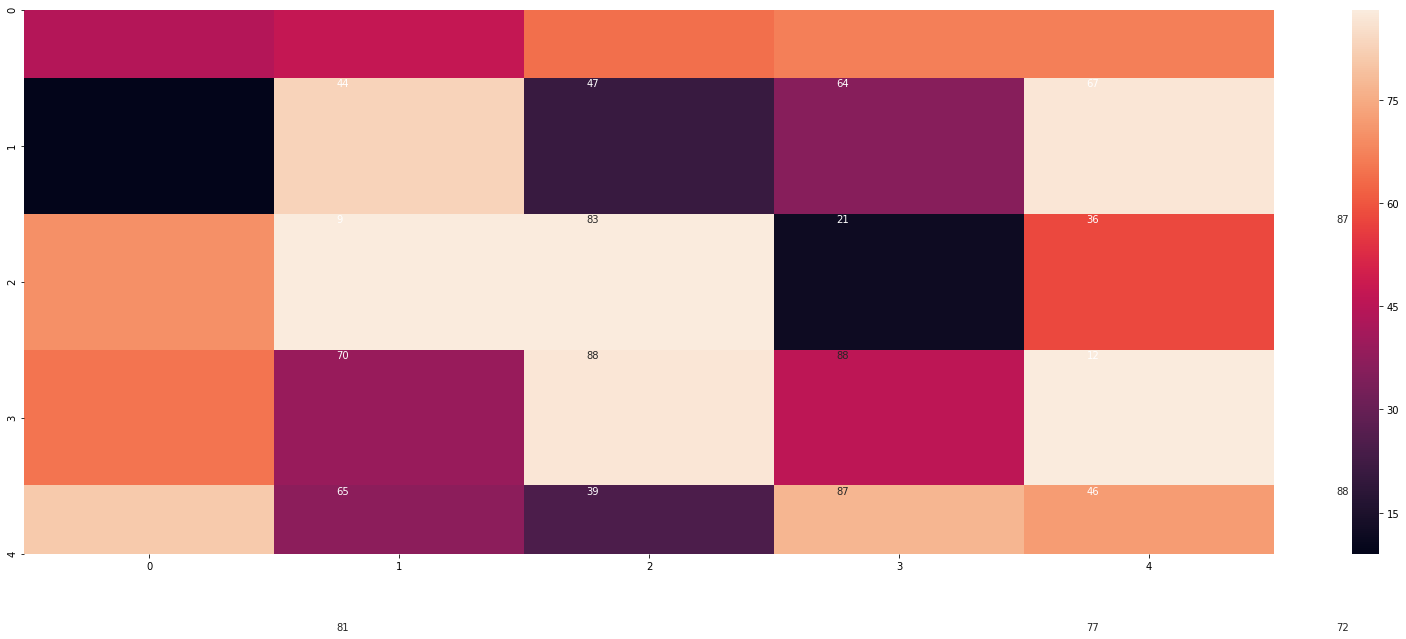

In [227]:
import seaborn as sns
import numpy as np; np.random.seed(0)
import matplotlib.pylab as plt
import matplotlib.transforms

data = np.random.randint(100, size=(5,5))
akws = {"ha": 'left',"va": 'top'}
ax = sns.heatmap(data,  annot=True, annot_kws=akws)

for t in ax.texts:
    trans = t.get_transform()
    offs = matplotlib.transforms.ScaledTranslation(0.75, 0.5,
                    matplotlib.transforms.IdentityTransform())
    t.set_transform( offs + trans )

plt.show()
offs = matplotlib.transforms.ScaledTranslation(0.50, 0.50,
                    matplotlib.transforms.IdentityTransform())

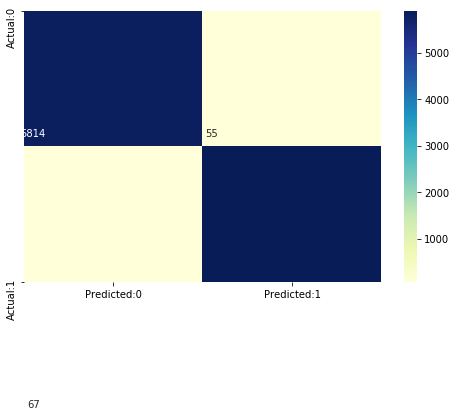

In [246]:
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
akws = {"ha": 'center',"va": 'center'}
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu" )
for t in ax.texts:
    trans = t.get_transform()
    offs = matplotlib.transforms.ScaledTranslation(-0.45,0.45,
                    matplotlib.transforms.IdentityTransform())
    t.set_transform( offs + trans )

plt.show()


In [229]:
result = classification_report(y_test, y_pred)

# print the result
print(result)

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      5869
         1.0       0.99      0.99      0.99      5966

    accuracy                           0.99     11835
   macro avg       0.99      0.99      0.99     11835
weighted avg       0.99      0.99      0.99     11835



In [200]:
print("Accuracy is:",metrics.accuracy_score(y_test,y_pred))

print('train score:',ran.score(X_train,y_train))

print('test score:',ran.score(X_test,y_test))

Accuracy is: 0.9903675538656527
train score: 0.9975737823646569
test score: 0.9903675538656527


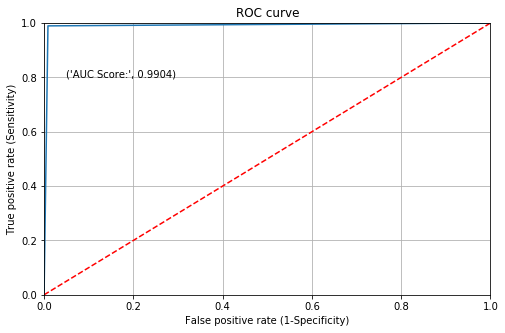

In [201]:
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred),4)))


# name the plot, and both axes
plt.title('ROC curve')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

In [202]:
ran_metrics = pd.Series({'Model': "RandomForest ",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),

                  'f1-score':metrics.f1_score(y_test, y_pred)})



# appending our result table
result_tabulation = result_tabulation.append(ran_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic regression,0.500810,0.666667,0.001789,0.841132,0.003568
1,Logistic regression After Smote,0.643063,0.643951,0.634560,0.643093,0.639221
2,Logistic regression after feature selection,0.717237,0.753936,0.650184,0.716688,0.698227
3,Decision Tree,0.988504,0.988111,0.989105,0.988509,0.988608
4,Pruned Decision Tree,0.986473,0.985776,0.987429,0.986481,0.986602
5,Decision Tree (GridSearchCV),0.882243,0.871507,0.899262,0.882383,0.885167
6,RandomForest,0.990375,0.991434,0.989440,0.990368,0.990436


## Random Forest Using Cross Valid

In [203]:

from sklearn.model_selection import cross_val_score
print(cross_val_score(RandomForestClassifier(max_depth=25), X, y, cv=10))


[0.9531052  0.95057034 0.96679341 0.98301648 0.96806084 0.97313054
 0.9721166  0.97617237 0.97667934 0.97718631]


## Naive Bayes

In [204]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test) 

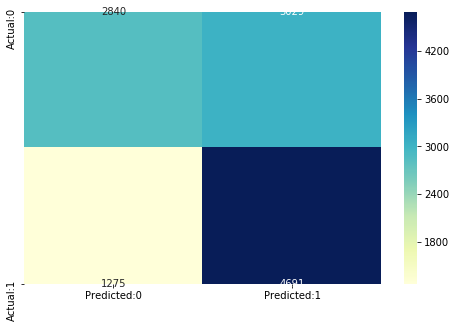

In [205]:
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.show()

In [206]:
result = classification_report(y_test, y_pred)

# print the result
print(result)

              precision    recall  f1-score   support

         0.0       0.69      0.48      0.57      5869
         1.0       0.61      0.79      0.69      5966

    accuracy                           0.64     11835
   macro avg       0.65      0.64      0.63     11835
weighted avg       0.65      0.64      0.63     11835



In [207]:
print("Accuracy is:",metrics.accuracy_score(y_test,y_pred))

print('train score:',classifier.score(X_train,y_train))

print('test score:',classifier.score(X_test,y_test))

Accuracy is: 0.6363329108576257
train score: 0.6355965960528698
test score: 0.6363329108576257


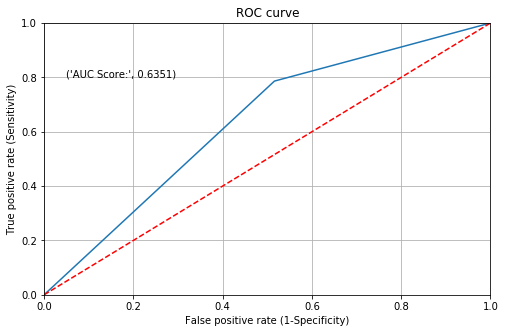

In [208]:
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred),4)))


# name the plot, and both axes
plt.title('ROC curve')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid"
plt.grid(True)

In [209]:
Naive_bayes = pd.Series({'Model': "Naive Bayes ",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),

                  'f1-score':metrics.f1_score(y_test, y_pred)})



# appending our result table
result_tabulation = result_tabulation.append(Naive_bayes , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic regression,0.500810,0.666667,0.001789,0.841132,0.003568
1,Logistic regression After Smote,0.643063,0.643951,0.634560,0.643093,0.639221
2,Logistic regression after feature selection,0.717237,0.753936,0.650184,0.716688,0.698227
3,Decision Tree,0.988504,0.988111,0.989105,0.988509,0.988608
4,Pruned Decision Tree,0.986473,0.985776,0.987429,0.986481,0.986602
5,Decision Tree (GridSearchCV),0.882243,0.871507,0.899262,0.882383,0.885167
6,RandomForest,0.990375,0.991434,0.989440,0.990368,0.990436
7,Naive Bayes,0.635094,0.607642,0.786289,0.636333,0.685518


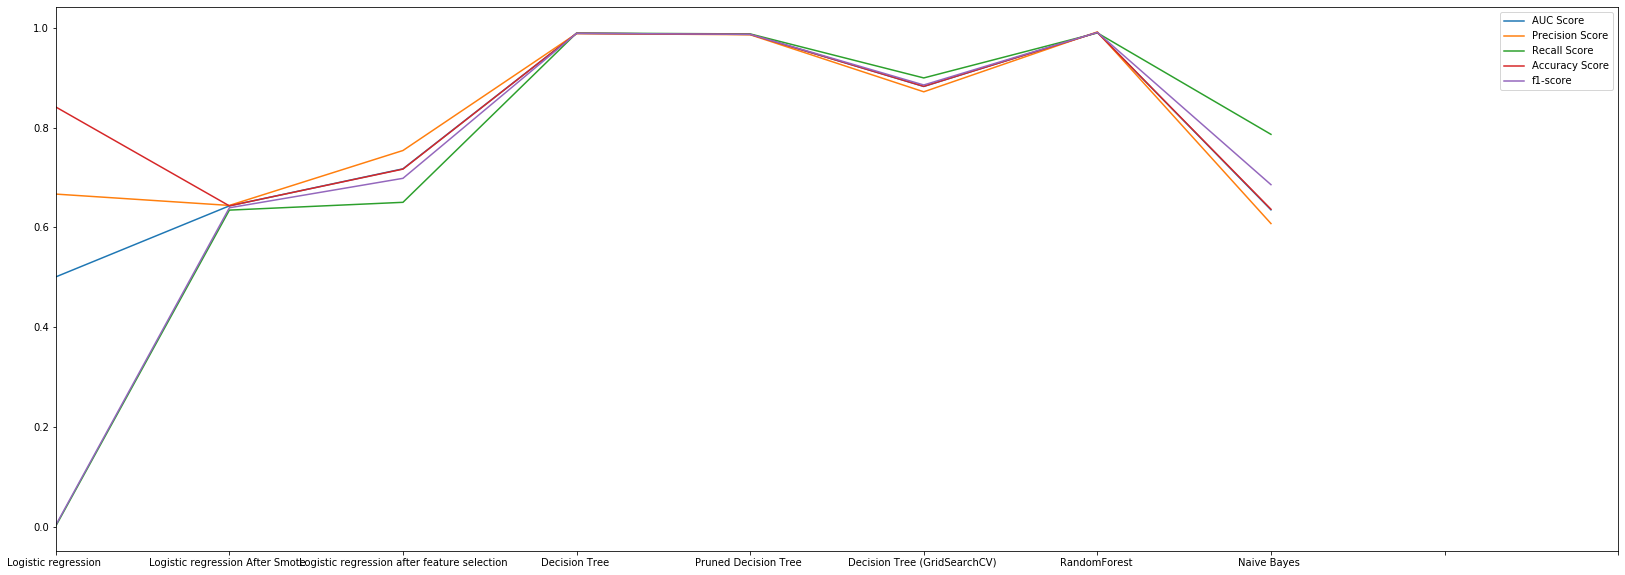

In [210]:
plt.rcParams['figure.figsize']=(28,10)

result_tabulation.plot()

plt.xticks([0,1,2,3,4,5,6,7,8,9], list(result_tabulation.Model))
plt.show()

In [211]:
result_tabulation.to_excel('result.xlsx')

## Ensemble

In [212]:
from sklearn.ensemble import AdaBoostClassifier


cls=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=200)
cls.fit(X_train,y_train)
yp=cls.predict(X_test)

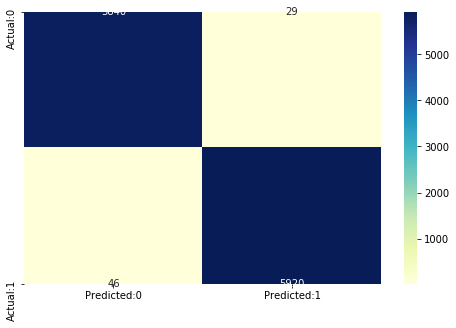

In [213]:
cm = confusion_matrix(y_test, yp)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.show()

In [214]:
result = classification_report(y_test, y_pred)

# print the result
print(result)

              precision    recall  f1-score   support

         0.0       0.69      0.48      0.57      5869
         1.0       0.61      0.79      0.69      5966

    accuracy                           0.64     11835
   macro avg       0.65      0.64      0.63     11835
weighted avg       0.65      0.64      0.63     11835



In [215]:
from sklearn import model_selection

In [217]:
from sklearn.ensemble import BaggingClassifier
seed = 8
kfold = model_selection.KFold(n_splits = 3, 
                       random_state = seed) 
  
# initialize the base classifier 
base_cls = DecisionTreeClassifier() 
  
# no. of base classifier 
num_trees = 500
  
# bagging classifier 
model = BaggingClassifier(base_estimator = base_cls, 
                          n_estimators = num_trees, 
                          random_state = seed) 
  
results = model_selection.cross_val_score(model, X, y, cv = kfold) 
print("accuracy :") 
print(results.mean())

accuracy :
0.9100126742712294


In [218]:
seed = 8
kfold = model_selection.KFold(n_splits = 3, 
                       random_state = seed) 
  
# initialize the base classifier 
base_cls = DecisionTreeClassifier() 
  
# no. of base classifier 
num_trees = 500
  
# bagging classifier 
model = AdaBoostClassifier(base_estimator = base_cls, 
                          n_estimators = num_trees, 
                          random_state = seed) 
  
results = model_selection.cross_val_score(model, X, y, cv = kfold) 
print("accuracy :") 
print(results.mean()) 

accuracy :
0.9216983523447402
